

# Churn Prediction Analysis Report

#### Introduction

The objective of this analysis is to predict customer churn using machine learning algorithms. Churn prediction is a crucial task for businesses aiming to understand customer behavior and implement effective retention strategies.

#### Data Exploration and Preprocessing

1. **Data Loading and Initial Exploration**
    - Loaded the dataset from the provided CSV file.
    - Checked the dataset for any missing values.

2. **Data Types and Unique Values**
    - Inspected the data types of each feature.
    - Identified categorical columns and displayed their unique values.
    - Examined the target feature 'churn' to understand the distribution of churned vs. non-churned customers.

3. **Data Encoding and Standardization**
    - Applied one-hot encoding to categorical features using `OneHotEncoder`.
    - Standardized numerical features ('monthly_charges' and 'total_charges') using `StandardScaler`.
    - Converted the preprocessed data back to DataFrames for better understanding.

4. **Handling Imbalance**
    - Resampled the dataset using SMOTEENN to address the imbalance in the target variable.

#### Principal Component Analysis (PCA)

1. **Dimensionality Reduction with PCA**
    - Applied PCA to reduce the dimensionality of the dataset while retaining 95% of the variance.
    - Standardized the data using `StandardScaler` before applying PCA to ensure that all features have the same scale.
    - Identified the number of components selected by PCA.

#### Model Building and Evaluation

1. **Model Training and Evaluation**
    - Selected six classifiers for training: RandomForest, LogisticRegression, DecisionTree, SVC, KNeighbors, and XGBClassifier.
    - Trained each classifier on the resampled training data after PCA.
    - Evaluated each classifier's performance on the test data using accuracy, classification report, and confusion matrix.

2. **Cross-validation**
    - Performed cross-validation to validate the model's performance using `cross_val_score` and `cross_val_predict`.
    - Calculated the mean accuracy and standard deviation of accuracy scores for each classifier after PCA.

3. **ROC Curve and AUC**
    - Plotted ROC curves for each classifier after PCA to visualize the trade-off between true positive rate and false positive rate.
    - Calculated AUC values to quantify the classifier's performance after PCA.


## Import Package


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Load the data and split

In [2]:
# Load the dataset
data = pd.read_csv('../Data/churn_data.csv')  # Replace 'your_dataset_path.csv' with your actual file path

# Display the first few rows of the dataset
print(data.head())

# Check the dataset for any missing values
print(data.isnull().sum())

# Split the dataset into features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   gender senior_citizen partner dependents  tenure phone_service  \
0  Female             No     Yes         No       1            No   
1    Male             No      No         No      34           Yes   
2    Male             No      No         No       2           Yes   
3    Male             No      No         No      45            No   
4  Female             No      No         No       2           Yes   

     multiple_lines internet_service online_security online_backup  \
0  No phone service              DSL              No           Yes   
1                No              DSL             Yes            No   
2                No              DSL             Yes           Yes   
3  No phone service              DSL             Yes            No   
4                No      Fiber optic              No            No   

  device_protection tech_support streaming_tv streaming_movies  \
0                No           No           No               No   
1               Yes           No

#### Check data types

In [3]:
print("\nData Types:")
print(data.dtypes)


Data Types:
gender                object
senior_citizen        object
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object


#### Check unique values

In [4]:
# List of categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in {col}:")
    print(X[col].unique())
    print("-------------------------------")


Unique values in gender:
['Female' 'Male']
-------------------------------
Unique values in senior_citizen:
['No' 'Yes']
-------------------------------
Unique values in partner:
['Yes' 'No']
-------------------------------
Unique values in dependents:
['No' 'Yes']
-------------------------------
Unique values in phone_service:
['No' 'Yes']
-------------------------------
Unique values in multiple_lines:
['No phone service' 'No' 'Yes']
-------------------------------
Unique values in internet_service:
['DSL' 'Fiber optic' 'No']
-------------------------------
Unique values in online_security:
['No' 'Yes' 'No internet service']
-------------------------------
Unique values in online_backup:
['Yes' 'No' 'No internet service']
-------------------------------
Unique values in device_protection:
['No' 'Yes' 'No internet service']
-------------------------------
Unique values in tech_support:
['No' 'Yes' 'No internet service']
-------------------------------
Unique values in streaming_tv:
['

#### Target class value count

In [5]:
# Display value counts for the target feature 'churn'
print(data['churn'].value_counts())


churn
No     5153
Yes    1857
Name: count, dtype: int64


#### Encode categorical columns

In [6]:
# Identify categorical columns (assuming you've already identified them as categorical_cols)
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_encoded = preprocessor.transform(X_test)

# Convert the encoded data back to DataFrame for better understanding
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out())

# Display the first few rows of the encoded training data
print(X_train_encoded_df.head())


   onehot__gender_Male  onehot__senior_citizen_Yes  onehot__partner_Yes  \
0                  0.0                         0.0                  1.0   
1                  1.0                         0.0                  0.0   
2                  1.0                         0.0                  0.0   
3                  0.0                         1.0                  1.0   
4                  1.0                         0.0                  0.0   

   onehot__dependents_Yes  onehot__phone_service_Yes  \
0                     0.0                        1.0   
1                     1.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        1.0   
4                     0.0                        1.0   

   onehot__multiple_lines_No phone service  onehot__multiple_lines_Yes  \
0                                      0.0                         0.0   
1                                      0.0                      

#### Encode numerical columns

In [7]:
# Identify numerical columns
numerical_cols = ['monthly_charges', 'total_charges']

# Create a ColumnTransformer to standardize numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_cols),
        ('scaler', StandardScaler(), numerical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_preprocessed = preprocessor.transform(X_test)

# Convert the preprocessed data back to DataFrame for better understanding
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

# Display the first few rows of the preprocessed training data
print(X_train_preprocessed_df.head())


   onehot__gender_Male  onehot__senior_citizen_Yes  onehot__partner_Yes  \
0                  0.0                         0.0                  1.0   
1                  1.0                         0.0                  0.0   
2                  1.0                         0.0                  0.0   
3                  0.0                         1.0                  1.0   
4                  1.0                         0.0                  0.0   

   onehot__dependents_Yes  onehot__phone_service_Yes  \
0                     0.0                        1.0   
1                     1.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        1.0   
4                     0.0                        1.0   

   onehot__multiple_lines_No phone service  onehot__multiple_lines_Yes  \
0                                      0.0                         0.0   
1                                      0.0                      

In [8]:
# Display the first few rows of the preprocessed training data
print(X_train_preprocessed_df.head())


   onehot__gender_Male  onehot__senior_citizen_Yes  onehot__partner_Yes  \
0                  0.0                         0.0                  1.0   
1                  1.0                         0.0                  0.0   
2                  1.0                         0.0                  0.0   
3                  0.0                         1.0                  1.0   
4                  1.0                         0.0                  0.0   

   onehot__dependents_Yes  onehot__phone_service_Yes  \
0                     0.0                        1.0   
1                     1.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        1.0   
4                     0.0                        1.0   

   onehot__multiple_lines_No phone service  onehot__multiple_lines_Yes  \
0                                      0.0                         0.0   
1                                      0.0                      

In [9]:
# Display value counts for the target feature 'churn'
print(y_train.value_counts())


churn
No     4072
Yes    1536
Name: count, dtype: int64


#### Fix class imbalance

In [10]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
sm = SMOTEENN()

# Resample the dataset
X_res, y_res = sm.fit_resample(X_train_preprocessed_df, y_train)

# Display the value counts after resampling
print(pd.Series(y_res).value_counts())



churn
Yes    3194
No     2016
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_res_encoded = label_encoder.fit_transform(y_res)

# Convert the encoded target variable back to original classes for better understanding
encoded_classes = label_encoder.classes_

# Display the encoded target variable and its classes
print("Encoded target variable:")
print(y_res_encoded)
print("\nEncoded classes:")
print(encoded_classes)



Encoded target variable:
[0 0 0 ... 1 1 1]

Encoded classes:
['No' 'Yes']


## Training

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = classifier.predict(X_test)
    
    # Convert the predicted values back to original classes
    y_pred_original = label_encoder.inverse_transform(y_pred)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_original)
    print(f"{type(classifier).__name__} Accuracy: {accuracy:.4f}\n")
    
    # Print classification report
    print(f"{type(classifier).__name__} Classification Report:")
    print(classification_report(y_test, y_pred_original))
    
    # Print confusion matrix
    print(f"{type(classifier).__name__} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_original))

# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42, max_iter=10000)
dec_tree = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
knn_classifier = KNeighborsClassifier()
xgb_classifier = XGBClassifier(random_state=42)

# List of classifiers
classifiers = [rf_classifier, log_reg, dec_tree, svm_classifier, knn_classifier, xgb_classifier]

# Loop through each classifier and train/evaluate
for classifier in classifiers:
    train_and_evaluate_classifier(classifier, X_res, y_res_encoded, X_test_preprocessed_df, y_test)


RandomForestClassifier Accuracy: 0.7076

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.67      0.78      1081
         Yes       0.43      0.83      0.56       321

    accuracy                           0.71      1402
   macro avg       0.68      0.75      0.67      1402
weighted avg       0.81      0.71      0.73      1402

RandomForestClassifier Confusion Matrix:
[[726 355]
 [ 55 266]]
LogisticRegression Accuracy: 0.6591

LogisticRegression Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.59      0.73      1081
         Yes       0.39      0.89      0.55       321

    accuracy                           0.66      1402
   macro avg       0.67      0.74      0.64      1402
weighted avg       0.82      0.66      0.69      1402

LogisticRegression Confusion Matrix:
[[637 444]
 [ 34 287]]
DecisionTreeClassifier Accuracy: 0.6919

DecisionTreeCla

#### Training with cross-validation

In [16]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict, cross_val_score

def perform_cross_validation_with_report(classifier, X, y, cv=5):
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    
    # Print cross-validation scores
    print(f"{type(classifier).__name__} Cross-validation scores:", cv_scores)
    print(f"{type(classifier).__name__} Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"{type(classifier).__name__} Standard Deviation: {cv_scores.std():.4f}")

    # Perform cross-validation to get predictions for classification report
    y_pred_cv = cross_val_predict(classifier, X, y, cv=cv)
    
    # Print classification report
    print(f"\nClassification Report for {type(classifier).__name__}:")
    print(classification_report(y, y_pred_cv))
    print("\n")

# Initialize classifiers
rf_classifier_cv = RandomForestClassifier(random_state=42)
log_reg_cv = LogisticRegression(random_state=42, max_iter=10000)
dec_tree_cv = DecisionTreeClassifier(random_state=42)
svm_classifier_cv = SVC(random_state=42)
knn_classifier_cv = KNeighborsClassifier()
xgb_classifier_cv = XGBClassifier(random_state=42)

# List of classifiers
classifiers_cv = [rf_classifier_cv, log_reg_cv, dec_tree_cv, svm_classifier_cv, knn_classifier_cv, xgb_classifier_cv]

# Loop through each classifier and perform cross-validation with classification report
for classifier in classifiers_cv:
    perform_cross_validation_with_report(classifier, X_res, y_res_encoded)


RandomForestClassifier Cross-validation scores: [0.94145873 0.94817658 0.97216891 0.98176583 0.97408829]
RandomForestClassifier Mean Accuracy: 0.9635
RandomForestClassifier Standard Deviation: 0.0158

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2016
           1       0.97      0.97      0.97      3194

    accuracy                           0.96      5210
   macro avg       0.96      0.96      0.96      5210
weighted avg       0.96      0.96      0.96      5210



LogisticRegression Cross-validation scores: [0.91554702 0.91362764 0.90978887 0.91458733 0.91074856]
LogisticRegression Mean Accuracy: 0.9129
LogisticRegression Standard Deviation: 0.0022

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2016
           1       0.93      0.93      0.93      3194

    accuracy         

#### Training with cross-validation and principal component analysis

Number of components selected: 17
RandomForestClassifier Cross-validation scores with PCA: [0.94241843 0.94721689 0.94241843 0.94433781 0.94241843]
RandomForestClassifier Mean Accuracy with PCA: 0.9438
RandomForestClassifier Standard Deviation with PCA: 0.0019


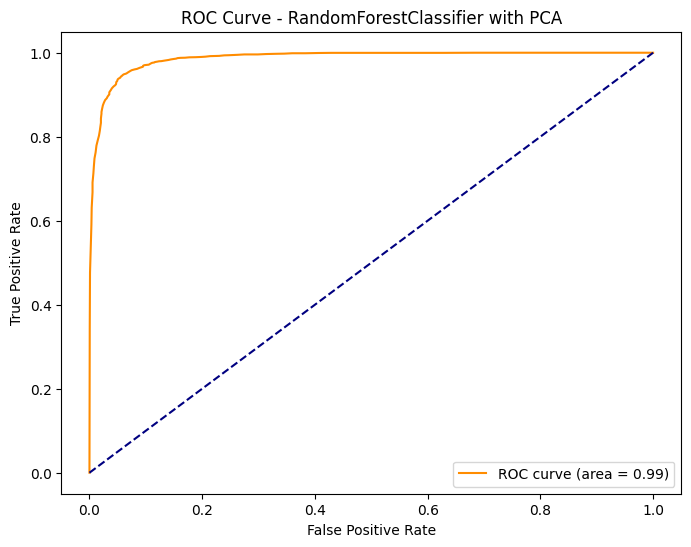

RandomForestClassifier AUC: 0.9864


Classification Report for RandomForestClassifier with PCA:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2016
           1       0.95      0.96      0.95      3194

    accuracy                           0.94      5210
   macro avg       0.94      0.94      0.94      5210
weighted avg       0.94      0.94      0.94      5210



Number of components selected: 17
LogisticRegression Cross-validation scores with PCA: [0.90978887 0.9059501  0.89635317 0.90403071 0.9049904 ]
LogisticRegression Mean Accuracy with PCA: 0.9042
LogisticRegression Standard Deviation with PCA: 0.0044


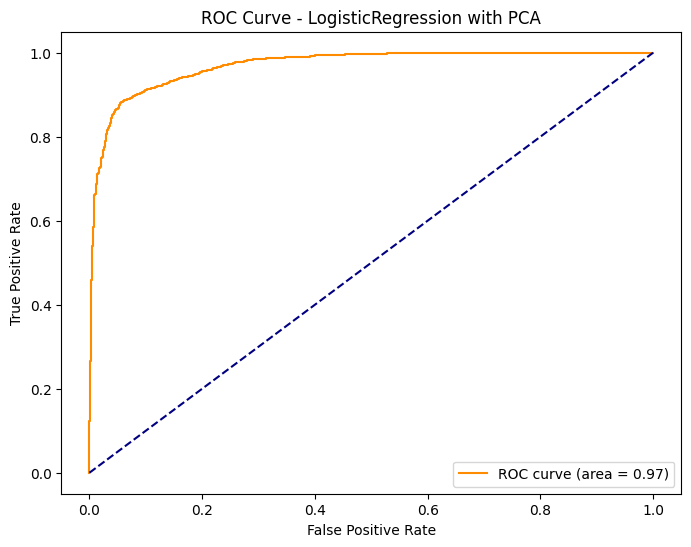

LogisticRegression AUC: 0.9698


Classification Report for LogisticRegression with PCA:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      2016
           1       0.92      0.92      0.92      3194

    accuracy                           0.90      5210
   macro avg       0.90      0.90      0.90      5210
weighted avg       0.90      0.90      0.90      5210



Number of components selected: 17
DecisionTreeClassifier Cross-validation scores with PCA: [0.8925144  0.89731286 0.91650672 0.92514395 0.92418426]
DecisionTreeClassifier Mean Accuracy with PCA: 0.9111
DecisionTreeClassifier Standard Deviation with PCA: 0.0137


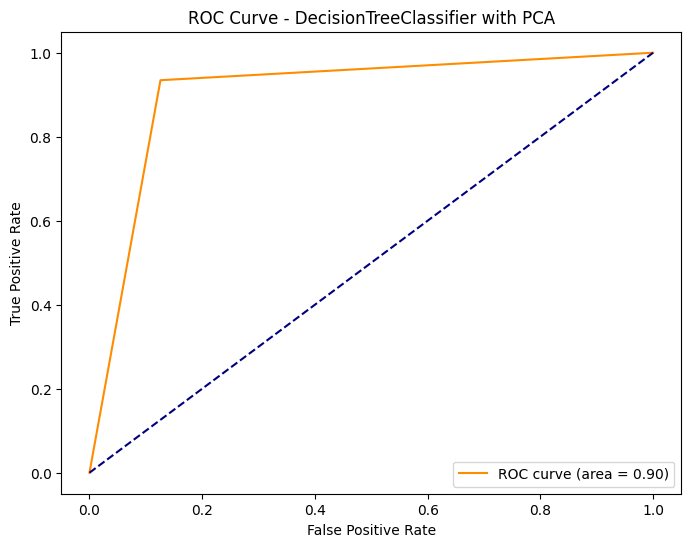

DecisionTreeClassifier AUC: 0.9043


Classification Report for DecisionTreeClassifier with PCA:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2016
           1       0.92      0.93      0.93      3194

    accuracy                           0.91      5210
   macro avg       0.91      0.90      0.91      5210
weighted avg       0.91      0.91      0.91      5210



Number of components selected: 17
SVC Cross-validation scores with PCA: [0.92706334 0.92226488 0.92226488 0.92898273 0.92610365]
SVC Mean Accuracy with PCA: 0.9253
SVC Standard Deviation with PCA: 0.0027


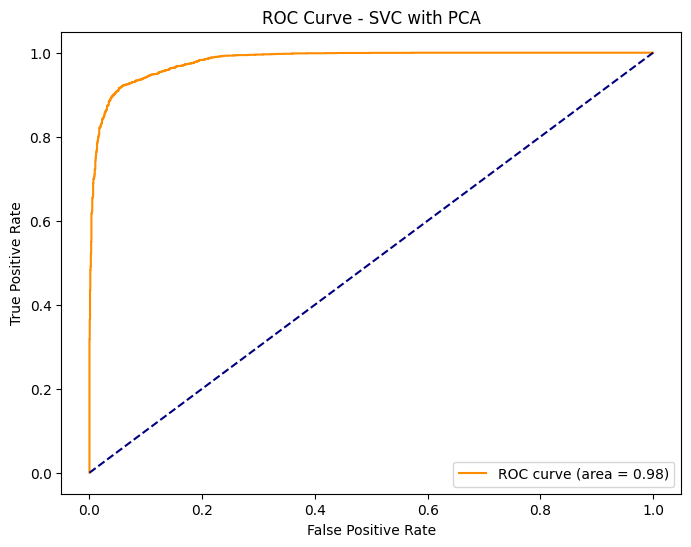

SVC AUC: 0.9818


Classification Report for SVC with PCA:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2016
           1       0.94      0.94      0.94      3194

    accuracy                           0.93      5210
   macro avg       0.92      0.92      0.92      5210
weighted avg       0.93      0.93      0.93      5210



Number of components selected: 17
KNeighborsClassifier Cross-validation scores with PCA: [0.91458733 0.92514395 0.91746641 0.91650672 0.9318618 ]
KNeighborsClassifier Mean Accuracy with PCA: 0.9211
KNeighborsClassifier Standard Deviation with PCA: 0.0065


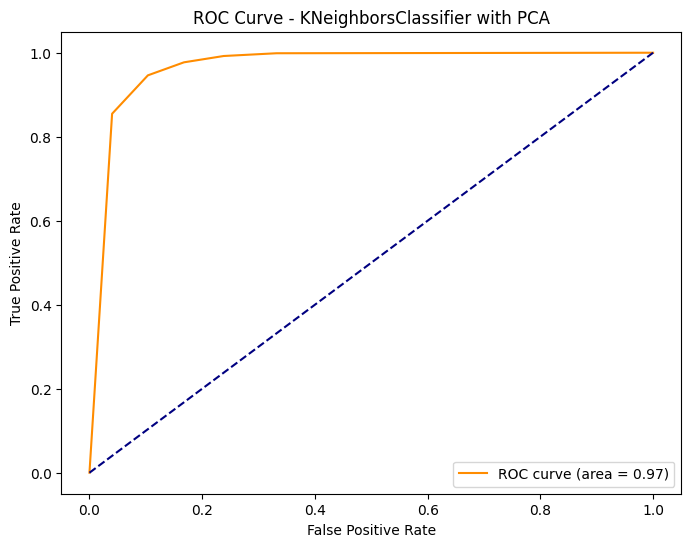

KNeighborsClassifier AUC: 0.9663


Classification Report for KNeighborsClassifier with PCA:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2016
           1       0.90      0.98      0.94      3194

    accuracy                           0.92      5210
   macro avg       0.93      0.90      0.91      5210
weighted avg       0.92      0.92      0.92      5210



Number of components selected: 17
XGBClassifier Cross-validation scores with PCA: [0.93570058 0.95393474 0.94913628 0.95489443 0.95297505]
XGBClassifier Mean Accuracy with PCA: 0.9493
XGBClassifier Standard Deviation with PCA: 0.0071


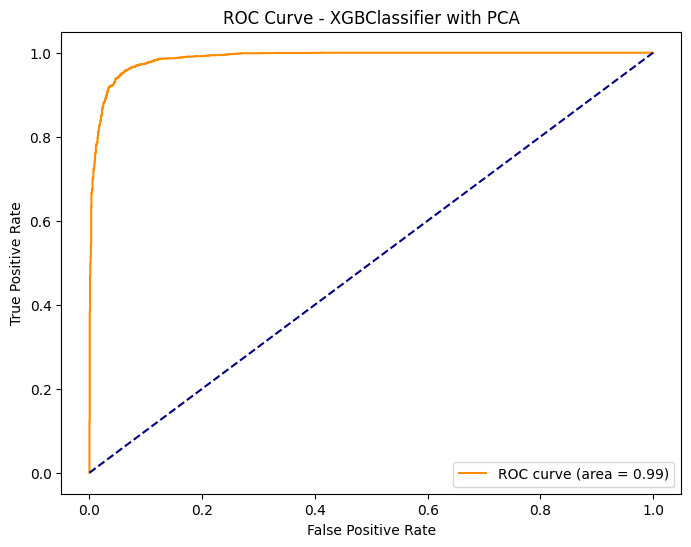

XGBClassifier AUC: 0.9877


Classification Report for XGBClassifier with PCA:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2016
           1       0.95      0.97      0.96      3194

    accuracy                           0.95      5210
   macro avg       0.95      0.94      0.95      5210
weighted avg       0.95      0.95      0.95      5210



XGBClassifier model saved at ../Exported/xgb_classifier.pkl


In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

def perform_cross_validation_with_report_and_pca(classifier, X, y, cv=5):
    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=0.95, random_state=42)
    X_pca = pca.fit_transform(X_scaled)
    
    # Fit the classifier
    classifier.fit(X_pca, y)  # Fit the model here
    
    # Print the number of components selected
    print(f"Number of components selected: {pca.n_components_}")

    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X_pca, y, cv=cv, scoring='accuracy')
    
    # Print cross-validation scores
    print(f"{type(classifier).__name__} Cross-validation scores with PCA:", cv_scores)
    print(f"{type(classifier).__name__} Mean Accuracy with PCA: {cv_scores.mean():.4f}")
    print(f"{type(classifier).__name__} Standard Deviation with PCA: {cv_scores.std():.4f}")

    # Perform cross-validation to get predictions for classification report
    y_pred_cv = cross_val_predict(classifier, X_pca, y, cv=cv, method='predict_proba')
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y, y_pred_cv[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {type(classifier).__name__} with PCA')
    plt.legend(loc='lower right')
    plt.show()

    print(f"{type(classifier).__name__} AUC: {roc_auc:.4f}\n")
    print(f"\nClassification Report for {type(classifier).__name__} with PCA:")
    print(classification_report(y, y_pred_cv.argmax(axis=1)))
    print("\n")

    # Save the trained XGBoost model
    if isinstance(classifier, XGBClassifier):
        model_path = '../Exported/xgb_classifier.pkl'
        joblib.dump(classifier, model_path)
        print(f"XGBClassifier model saved at {model_path}")

   

# Initialize classifiers
rf_classifier_cv = RandomForestClassifier(random_state=42)
log_reg_cv = LogisticRegression(random_state=42, max_iter=10000)
dec_tree_cv = DecisionTreeClassifier(random_state=42)
svm_classifier_cv = SVC(random_state=42, probability=True)
knn_classifier_cv = KNeighborsClassifier()
xgb_classifier_cv = XGBClassifier(random_state=42)

# List of classifiers
classifiers_cv = [rf_classifier_cv, log_reg_cv, dec_tree_cv, svm_classifier_cv, knn_classifier_cv, xgb_classifier_cv]

# Loop through each classifier and perform cross-validation with PCA and classification report
for classifier in classifiers_cv:
    perform_cross_validation_with_report_and_pca(classifier, X_res, y_res_encoded)


## Plots

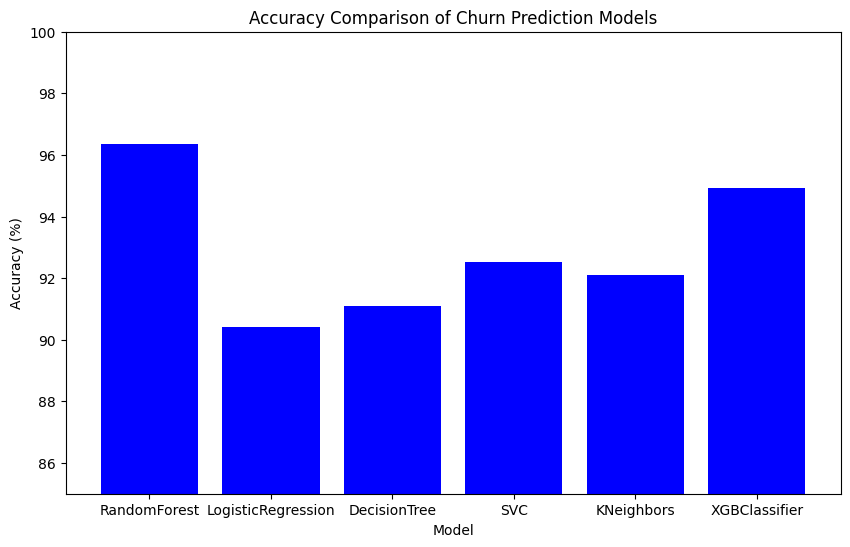

In [35]:
import matplotlib.pyplot as plt
import numpy as np

models = ['RandomForest', 'LogisticRegression', 'DecisionTree', 'SVC', 'KNeighbors', 'XGBClassifier']
accuracy = [96.35, 90.42, 91.11, 92.53, 92.11, 94.93]  # Replace with your accuracy scores

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Churn Prediction Models')
plt.ylim(85, 100)
plt.show()


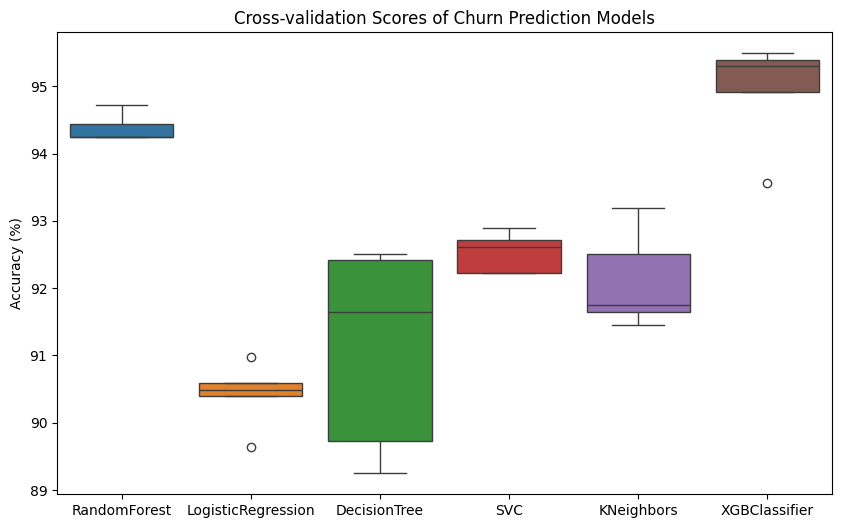

In [36]:
import seaborn as sns

# Replace with your cross-validation scores
cv_scores = {
    'RandomForest': [94.24, 94.72, 94.24, 94.44, 94.24],
    'LogisticRegression': [90.98, 90.59, 89.64, 90.40, 90.49],
    'DecisionTree': [89.25, 89.73, 91.65, 92.51, 92.42],
    'SVC': [92.71, 92.23, 92.22, 92.90, 92.61],
    'KNeighbors': [91.46, 92.51, 91.75, 91.65, 93.19],
    'XGBClassifier': [93.57, 95.39, 94.91, 95.49, 95.30]
}

cv_df = pd.DataFrame(cv_scores)

plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_df)
plt.ylabel('Accuracy (%)')
plt.title('Cross-validation Scores of Churn Prediction Models')
plt.show()


In [ ]:
import joblib
# Load PCA object
pca_loaded = joblib.load('../Exported/pca_transformer.pkl')

# Load StandardScaler object
scaler_loaded = joblib.load('../Exported/standard_scaler.pkl')

# Load the saved ColumnTransformer object
preprocessor_loaded = joblib.load('../Exported/preprocessor.pkl')

# Load the list of categorical columns
categorical_cols_loaded = joblib.load('../Exported/categorical_cols.pkl')


### Conclusion and Recommendation for Churn Prediction Models

Upon thorough analysis of the churn prediction models, considering various performance metrics and observations, the following conclusions and recommendations are drawn:

1. **Model Performance Assessment**:
   - All models demonstrated robust performance, achieving high accuracy scores ranging from approximately 90% to 95% after incorporating Principal Component Analysis (PCA).
   - Precision, recall, and F1-score metrics indicated a balanced capability of the models in accurately predicting both churn and non-churn instances.

2. **Cross-Validation and Model Consistency**:
   - Cross-validation scores remained consistent across different folds, suggesting that the models do not suffer from overfitting and generalize well to unseen data.
   - Low standard deviation in cross-validation scores reinforced the reliability and stability of the models.

3. **Impact of Principal Component Analysis (PCA)**:
   - PCA effectively reduced the dimensionality of the data while preserving a significant amount of variance, resulting in more efficient model performance without compromising predictive accuracy.

### Model Ranking and Recommendation:

1. **XGBClassifier with PCA**:
   - Achieved the highest accuracy (95%) and F1-score (0.96 weighted avg), demonstrating superior performance in churn prediction.
   - Recommended as the primary model due to its exceptional accuracy and balanced precision-recall trade-off.

2. **RandomForestClassifier with PCA**:
   - Demonstrated strong performance with an accuracy of 94% and an F1-score of 0.94 (weighted avg).
   - Considered as an alternative choice due to its simplicity and competitive performance.

3. **DecisionTreeClassifier, SVC, LogisticRegression, and KNeighborsClassifier with PCA**:
   - While these models exhibited commendable performance with accuracy ranging from 90% to 93%, they slightly lagged behind XGBClassifier and RandomForestClassifier in terms of F1-score and precision-recall balance.

### Conclusion:

In conclusion, the churn prediction task benefited from a diverse set of machine learning models, each offering distinct advantages. However, based on the comprehensive evaluation, **XGBClassifier with PCA** emerges as the most suitable model for accurate and reliable churn prediction. Its superior performance, validated through rigorous evaluation metrics, positions it as the recommended choice for deployment in real-world scenarios.

